In [52]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import nltk
import difflib
from sklearn.decomposition import LatentDirichletAllocation

pd.options.display.max_columns=999
pd.options.display.max_rows=999

In [38]:
def show_card(card_name):
    card = commanders[commanders.name==card_name].head(1)
    response = requests.get(card.image_uris.tolist()[0]['normal'])
    img = Image.open(BytesIO(response.content))
    return img

In [8]:
commanders = pd.read_json('Data/scryfall-default-cards.json')
commanders.drop(columns=['all_parts','arena_id','artist_ids','booster','border_color','card_back_id','card_faces',
                       'collector_number','digital','flavor_text','foil','frame','frame_effects','full_art',
                       'hand_modifier','id','illustration_id','life_modifier','mtgo_foil_id','mtgo_id',
                       'multiverse_ids','nonfoil','object','oracle_id','printed_name','prints_search_uri',
                       'promo','promo_types','rarity','related_uris','rulings_uri','scryfall_set_uri','set_type',
                       'set_uri','story_spotlight','uri','variation','variation_of','watermark'],inplace=True)

In [10]:
commanders.columns

Index(['artist', 'cmc', 'color_identity', 'color_indicator', 'colors',
       'edhrec_rank', 'games', 'highres_image', 'image_uris', 'lang', 'layout',
       'legalities', 'loyalty', 'mana_cost', 'name', 'oracle_text',
       'oversized', 'power', 'preview', 'printed_text', 'printed_type_line',
       'released_at', 'reprint', 'reserved', 'scryfall_uri', 'set', 'set_name',
       'set_search_uri', 'tcgplayer_id', 'textless', 'toughness', 'type_line'],
      dtype='object')

In [11]:
commanders = commanders[commanders.type_line.str.contains('Legendary Creature')]

In [18]:
commanders.legalities = [card['commander'] for card in commanders.legalities]
commanders = commanders[commanders.legalities=='legal']

In [20]:
commanders.games = ['paper' in card for card in commanders.games]
commanders = commanders[commanders.games]

In [41]:
commanders.oracle_text.tolist()

["Yorvo, Lord of Garenbrig enters the battlefield with four +1/+1 counters on it.\nWhenever another green creature enters the battlefield under your control, put a +1/+1 counter on Yorvo. Then if that creature's power is greater than Yorvo's power, put another +1/+1 counter on Yorvo.",
 "Vigilance, deathtouch, haste\nQuesting Beast can't be blocked by creatures with power 2 or less.\nCombat damage that would be dealt by creatures you control can't be prevented.\nWhenever Questing Beast deals combat damage to an opponent, it deals that much damage to target planeswalker that player controls.",
 'If a red source you control would deal damage to an opponent or a permanent an opponent controls, it deals that much damage plus 2 instead.',
 'Flying, haste\nWhenever Rankle, Master of Pranks deals combat damage to a player, choose any number —\n• Each player discards a card.\n• Each player loses 1 life and draws a card.\n• Each player sacrifices a creature.',
 'Whenever Ayara, First of Locthwa

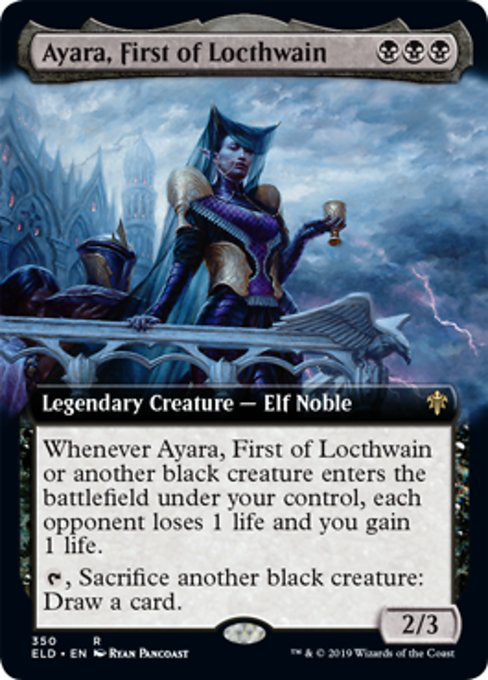

In [40]:
show_card('Ayara, First of Locthwain')

In [50]:
def recommend_commander():
    input()
    difflib.get_close_matches('ayara, first of locthwain',commanders.name.tolist(),len(commanders.name.tolist()),0)

['Ayara, First of Locthwain',
 'Ayara, First of Locthwain',
 'Rayami, First of the Fallen',
 'Baru, Fist of Krosa',
 'Hapatra, Vizier of Poisons',
 'Hapatra, Vizier of Poisons',
 'Kambal, Consul of Allocation',
 'Kambal, Consul of Allocation',
 'Kamahl, Fist of Krosa',
 'Kamahl, Fist of Krosa',
 'Reyhan, Last of the Abzan',
 'Reyhan, Last of the Abzan',
 'Sigarda, Host of Herons',
 'Sigarda, Host of Herons',
 'Sigarda, Host of Herons',
 'Marath, Will of the Wild',
 'Kiyomaro, First to Stand',
 'Kiyomaro, First to Stand',
 'Rafiq of the Many',
 'Rafiq of the Many',
 'Baral, Chief of Compliance',
 'Baral, Chief of Compliance',
 'Selvala, Heart of the Wilds',
 'Savra, Queen of the Golgari',
 'Savra, Queen of the Golgari',
 'Masumaro, First to Live',
 'Jalira, Master Polymorphist',
 'Jalira, Master Polymorphist',
 'Drana, Liberator of Malakir',
 'Drana, Liberator of Malakir',
 'Titania, Protector of Argoth',
 'Titania, Protector of Argoth',
 'Naban, Dean of Iteration',
 'Naban, Dean of Ite

In [51]:
'ayara, first of locthwain'.title()

'Ayara, First Of Locthwain'